In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/giovani/Dropbox/rhenium/rhenium_EOS/matplotlib-quattrocento.mplstyle')

# Removing outliers

In [16]:
cet_10 = np.loadtxt("../VT_fittings/sp2/sp2_10_90a.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_10_90a.txt','r') as f:
    id_10 = [x.split()[0] for x in f.readlines()]

cet_20 = np.loadtxt("../VT_fittings/sp2/sp2_20_80.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_20_80.txt','r') as f:
    id_20 = [x.split()[0] for x in f.readlines()]
    
cet_30 = np.loadtxt("../VT_fittings/sp2/sp2_30_70.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_30_70.txt','r') as f:
    id_30 = [x.split()[0] for x in f.readlines()]
    
cet_40 = np.loadtxt("../VT_fittings/sp2/sp2_40_60.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_40_60.txt','r') as f:
    id_40 = [x.split()[0] for x in f.readlines()]
    
cet_50 = np.loadtxt("../VT_fittings/sp2/sp2_50_50.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_50_50.txt','r') as f:
    id_50 = [x.split()[0] for x in f.readlines()]
    
cet_60 = np.loadtxt("../VT_fittings/sp2/sp2_60_40.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_60_40.txt','r') as f:
    id_60 = [x.split()[0] for x in f.readlines()]
    
cet_70 = np.loadtxt("../VT_fittings/sp2/sp2_70_30.txt")[:,1:3]
with open('../VT_fittings/sp2/sp2_70_30.txt','r') as f:
    id_70 = [x.split()[0] for x in f.readlines()]

cet_10 = cet_10*1e6
cet_20 = cet_20*1e6
cet_30 = cet_30*1e6
cet_40 = cet_40*1e6
cet_50 = cet_50*1e6
cet_60 = cet_60*1e6
cet_70 = cet_70*1e6

In [20]:
#DATA WITHOUT OUTLIERS. We generate a list with the ids of the CRNs to be included 


data_100 = [cet_10[:,0],cet_20[:,0],cet_30[:,0],cet_40[:,0],cet_50[:,0],cet_60[:,0],cet_70[:,0]]
data_300 = [cet_10[:,1],cet_20[:,1],cet_30[:,1],cet_40[:,1],cet_50[:,1],cet_60[:,1],cet_70[:,1]]

ID = [id_10,id_20, id_30, id_40, id_50, id_60, id_70]

whis=1.5

selected = []
excluded = []
for n in range(len(data_100)):
    cet100 = data_100[n]
    Q1_100,Q3_100 = np.percentile(cet100,[25,75])
    upper_limit_100 = Q3_100+whis*(Q3_100-Q1_100)
    lower_limit_100 = Q1_100-whis*(Q3_100-Q1_100)
    
    cet300 = data_300[n]
    Q1_300,Q3_300 = np.percentile(cet300,[25,75])
    upper_limit_300 = Q3_300+whis*(Q3_300-Q1_300)
    lower_limit_300 = Q1_300-whis*(Q3_300-Q1_300)
    
    ids = []
    exc = []
    for i in range(len(cet100)):
        if (lower_limit_100 < cet100[i] < upper_limit_100) and (lower_limit_300 < cet300[i] < upper_limit_300):
            ids.append(ID[n][i])
        else:
            exc.append(ID[n][i])
    selected.append(ids)
    excluded.append(exc)

    

In [17]:
#DATA WITHOUT OUTLIERS. We generate a list with the ids of the CRNs to be included 


data_100 = [cet_10[:,0],cet_20[:,0],cet_30[:,0],cet_40[:,0],cet_50[:,0],cet_60[:,0],cet_70[:,0]]
data_300 = [cet_10[:,1],cet_20[:,1],cet_30[:,1],cet_40[:,1],cet_50[:,1],cet_60[:,1],cet_70[:,1]]

ID = [id_10,id_20, id_30, id_40, id_50, id_60, id_70]

whis=1.5

id_100 = []
excluded_100 = []
for n in range(len(data_100)):
    cet = data_100[n]
    Q1,Q3 = np.percentile(cet,[25,75])
    upper_limit = Q3+whis*(Q3-Q1)
    lower_limit = Q1-whis*(Q3-Q1)
    ids = []
    excluded = []
    for i in range(len(cet)):
        if lower_limit < cet[i] < upper_limit:
            ids.append(ID[n][i])
        else:
            excluded.append(ID[n][i])
    id_100.append(ids)
    excluded_100.append(excluded)


id_300 = []
excluded_300 = []
for n in range(len(data_300)):
    cet = data_300[n]
    Q1,Q3 = np.percentile(cet,[25,75])
    upper_limit = Q3+whis*(Q3-Q1)
    lower_limit = Q1-whis*(Q3-Q1)
    ids = []
    excluded = []
    for i in range(len(cet)):
        if lower_limit < cet[i] < upper_limit:
            ids.append(ID[n][i])
        else:
            excluded.append(ID[n][i])
    id_300.append(ids)
    excluded_300.append(excluded)
    

In [18]:
for i in range(len(folders)):
    print('-----',folders[i])
    print('100K:',excluded_100[i])
    print('300K:',excluded_300[i])


----- 10_90
100K: ['1175']
300K: ['0004', '0006', '1175']
----- 20_80
100K: ['0405', '0539', '0558', '0762', '0808', '1908']
300K: ['0558', '0808']
----- 30_70
100K: ['0003']
300K: ['0003', '0452', '0833']
----- 40_60
100K: ['0001', '0006', '0012', '0157']
300K: ['0001', '0012', '0353']
----- 50_50
100K: ['0000', '0007']
300K: []
----- 60_40
100K: ['0010', '0022', '0852']
300K: ['0022', '0852']
----- 70_30
100K: ['0849']
300K: ['0849']


In [10]:
for i in range(len(ID)):
    a = set(ID[i])
    b = set(id_100[i])
    c = set(id_300[i])
    print('-----',folders[i])
    print('100K:',a.difference(b))
    print('300K:',a.difference(c))

----- 10_90
100K: set()
300K: {'0006', '0004'}
----- 20_80
100K: set()
300K: set()
----- 30_70
100K: set()
300K: {'0452', '0833'}
----- 40_60
100K: set()
300K: {'0353'}
----- 50_50
100K: set()
300K: set()
----- 60_40
100K: set()
300K: set()
----- 70_30
100K: set()
300K: set()


# DOS

In [9]:
#Here we get the DOS of the CRNs wich are included in the list without the outliers

folders = ['10_90', '20_80', '30_70', '40_60', '50_50', '60_40', '70_30']

DOS = []
max_freq = 200

ID = list(id_100)

for n in range(len(folders)):
    folder = folders[n]
    files_list = [f'{folder}sp2_0{i}.dens' for i in ID[n]]
    sum_dos = 0
    count = 0
    for f in files_list:
        f,dos = np.loadtxt(f'./sp2/{folder}/{f}',unpack=True)
        f = f[:int(max_freq*2)]
        dos = dos[:int(max_freq*2)]
        sum_dos = sum_dos + dos
        count += 1
    
    DOS.append(sum_dos/count)
    


In [98]:
#Here we get the DOS of the CRNs wich are included in the list without the outliers

folders = ['10_90', '20_80', '30_70', '40_60', '50_50', '60_40', '70_30']

#DOS_all is a list with 7 elements. Each element is a list with the DOS of a specific sp2-C content.

DOS_all = []
max_freq = 200

ID = list(id_100)

for n in range(len(folders)):
    folder = folders[n]
    files_list = [f'{folder}sp2_0{i}.dens' for i in ID[n]]
    sum_dos = 0
    count = 0
    DOS = []
    for f in files_list:
        f,dos = np.loadtxt(f'./sp2/{folder}/{f}',unpack=True)
        f = f[:int(max_freq*2)]
        dos = dos[:int(max_freq*2)]
        DOS.append(dos)
        count += 1
    
    DOS_all.append(DOS)
    
DOS_average = [np.average(x,axis=0) for x in DOS_all]
DOS_std = [np.std(x,axis=0,ddof=1)/np.sqrt(len(DOS_all)) for x in DOS_all]

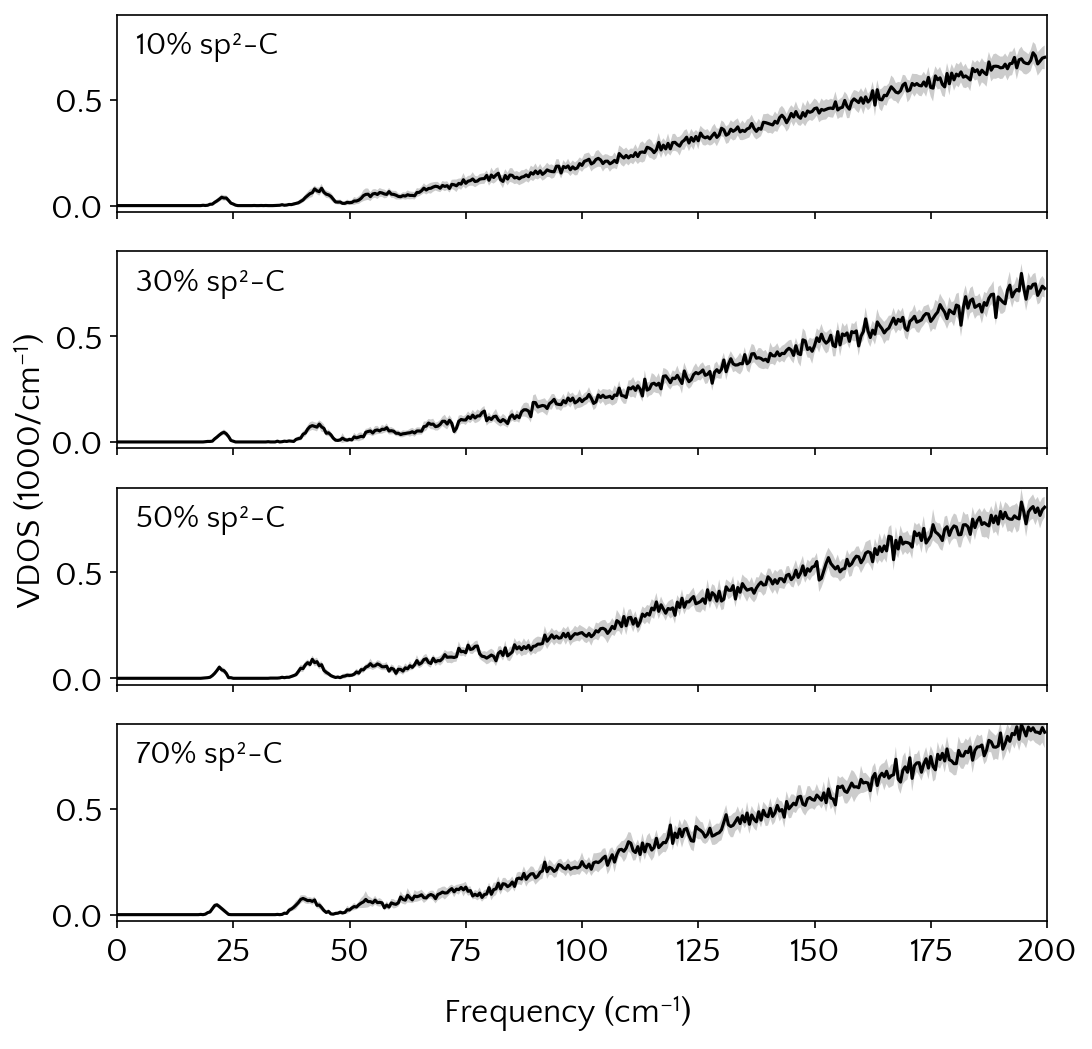

In [99]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(8, 8),dpi=150)
folders = ['10_90','30_70','50_50','70_30']
texts = ['10% sp²-C','30% sp²-C','50% sp²-C','70% sp²-C']
top_y = 0.9
for n,folder in enumerate(folders):
    dos_max = np.array(DOS_average[n])+np.array(DOS_std[n])
    dos_min = np.array(DOS_average[n])-np.array(DOS_std[n])
    ax[n].fill_between(f,5e3*dos_max,5e3*dos_min, edgecolor=None, alpha=0.2,facecolor='k')    
    ax[n].plot(f,5e3*DOS_average[n], label=folder, color='k')
    ax[n].set_xlim(0,max_freq)
    ax[n].set_ylim(-0.03,top_y)
    ax[n].text(0.02, 0.92, texts[n], verticalalignment='top', horizontalalignment='left',
               transform=ax[n].transAxes, color='black', fontsize=15)

fig.text(0.5, 0.04, 'Frequency (cm$^{-1}$)', ha='center')
fig.text(0.04, 0.5, 'VDOS (1000/cm$^{-1}$)', va='center', rotation='vertical')
plt.savefig('panel_VDOS.pdf')
plt.show()

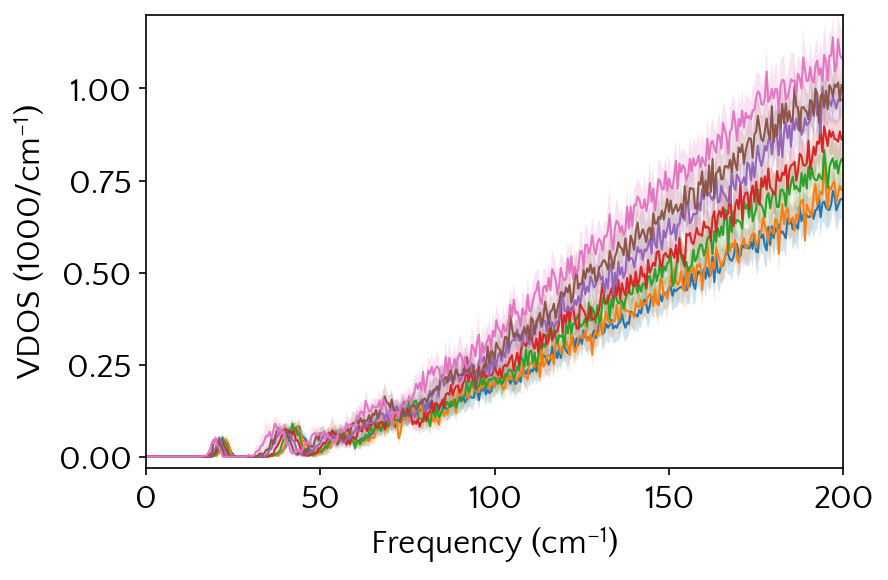

In [101]:
fig = plt.figure(dpi=150)

folders = ['10_90', '20_80', '30_70', '40_60', '50_50', '60_40', '70_30']
texts = ['10% sp²-C','20% sp²-C','30% sp²-C','40% sp²-C','50% sp²-C','60% sp²-C','70% sp²-C']
top_y = 1.2
for n,folder in enumerate(folders):
    dos_max = np.array(DOS_average[n])+np.array(DOS_std[n])
    dos_min = np.array(DOS_average[n])-np.array(DOS_std[n])
    l, = plt.plot(f,5e3*DOS_average[n], label=texts[n], lw=1)
    plt.fill_between(f,5e3*dos_max,5e3*dos_min, edgecolor=None, alpha=0.2,facecolor=l.get_color())  
    plt.xlim(0,max_freq)
    plt.ylim(-0.03,top_y)

plt.xlabel('Frequency (cm$^{-1}$)')
plt.ylabel('VDOS (1000/cm$^{-1}$)')
plt.show()

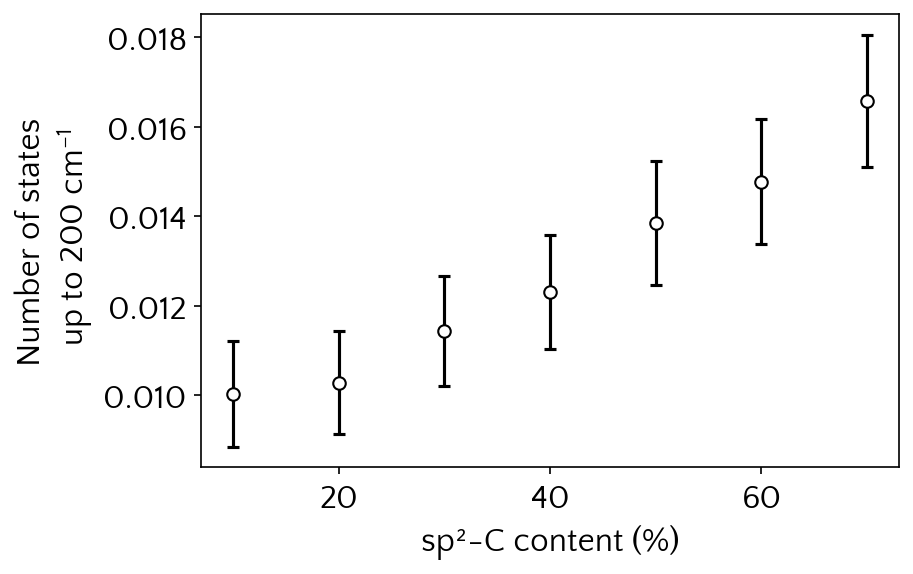

In [104]:
sp = [10,20,30,40,50,60,70]
states = []
states_error = []
for i in range(len(folders)):
    states.append(np.trapz(DOS_average[i],dx=0.5))
    states_error.append(np.trapz(DOS_std[i],dx=0.5))
    
plt.figure(dpi=150)
#plt.scatter(sp,states,c='w', marker='s', edgecolor='C1', linewidth=1.5)

plt.errorbar(sp, states, yerr=states_error, fmt='o', capsize=3, color='k',
             capthick=1.5, elinewidth=1.5, markerfacecolor='w', markeredgecolor='k', zorder=2 )
plt.xlabel('sp²-C content (%)')
plt.ylabel('Number of states\n up to 200 cm$^{-1}$')
plt.show()